In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [54]:
data_size = 1000

In [55]:
data = np.random.rand(data_size, 3) * 5
data[:,-1] = np.zeros(data_size)
data[:10]

array([[ 1.92653148,  0.58122763,  0.        ],
       [ 2.27586544,  0.09917818,  0.        ],
       [ 1.48124403,  1.63225666,  0.        ],
       [ 2.46548039,  3.13305315,  0.        ],
       [ 1.67403073,  3.14894589,  0.        ],
       [ 4.29194542,  2.01824225,  0.        ],
       [ 0.67823737,  0.13321555,  0.        ],
       [ 2.0877157 ,  2.47933276,  0.        ],
       [ 0.97451878,  2.6506    ,  0.        ],
       [ 2.71760003,  3.40053073,  0.        ]])

In [111]:
data[:,2] = (data[:,0] + data[:,1]) > 5
data

array([[ 1.93,  0.58,  0.  ],
       [ 2.28,  0.1 ,  0.  ],
       [ 1.48,  1.63,  0.  ],
       ..., 
       [ 2.44,  0.12,  0.  ],
       [ 2.34,  0.94,  0.  ],
       [ 2.51,  0.78,  0.  ]])

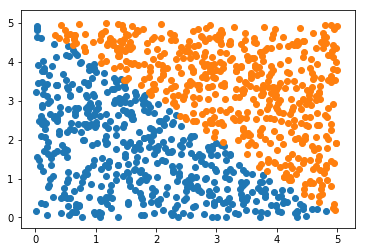

In [112]:
plt.scatter(data[data[:,2] == 0,0], data[data[:,2] == 0,1])
plt.scatter(data[data[:,2] == 1,0], data[data[:,2] == 1,1], color='C1')
plt.show()

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0:2], data[:,2], test_size=0.3))

In [129]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), kernel_initializer='uniform', activation='sigmoid'))
optimizer = Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1)

Epoch 1/10
700/700 [==============================] - 1s 1ms/step - loss: 0.3746
Epoch 2/10
700/700 [==============================] - 1s 862us/step - loss: 0.2059
Epoch 3/10
700/700 [==============================] - 1s 869us/step - loss: 0.1651
Epoch 4/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1440
Epoch 5/10
700/700 [==============================] - 1s 887us/step - loss: 0.1370
Epoch 6/10
700/700 [==============================] - 1s 792us/step - loss: 0.1232
Epoch 7/10
700/700 [==============================] - 1s 827us/step - loss: 0.1138
Epoch 8/10
700/700 [==============================] - 1s 996us/step - loss: 0.1072
Epoch 9/10
700/700 [==============================] - 1s 851us/step - loss: 0.1027
Epoch 10/10
700/700 [==============================] - 1s 831us/step - loss: 0.0942


In [131]:
print(model.evaluate(x_test, y_test, batch_size=1))

300/300 [==============================] - 0s 2ms/step
0.075208958625


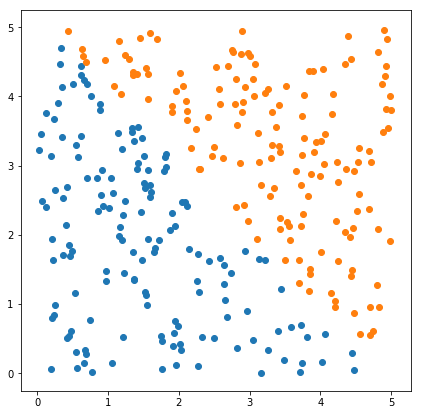

In [132]:
plt.figure(figsize=(7,7))
y_predict = model.predict(x_test).reshape(-1)
y_predict = y_predict < 0.5
plt.scatter(x_test[y_predict, 0], x_test[y_predict, 1])
plt.scatter(x_test[y_predict == False, 0], x_test[y_predict == False, 1], color='C1')
plt.show()

In [133]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 4.14],
       [ 3.98]], dtype=float32), array([-20.27], dtype=float32)]


In [135]:
y_predict = model.predict(x_test).reshape(-1)
np.set_printoptions(precision=2, suppress=True)
print(y_predict)

[ 0.93  1.    0.    1.    0.23  0.35  1.    0.98  0.    0.    0.33  1.    0.
  0.    0.56  0.71  0.05  0.23  0.    0.99  1.    1.    0.    1.    0.01
  0.    0.95  1.    0.99  0.97  0.    0.    1.    0.    1.    1.    1.    1.
  0.84  1.    0.66  1.    1.    1.    1.    1.    0.    1.    1.    0.
  0.01  0.36  0.7   0.46  0.    0.23  1.    0.95  1.    0.    1.    0.
  0.02  0.82  0.    0.96  0.    0.09  0.69  0.01  0.98  0.    0.23  0.01
  0.    1.    0.99  0.24  0.35  0.95  0.74  1.    0.01  0.93  1.    0.41
  1.    0.    0.    0.08  0.    0.08  0.15  1.    1.    0.    0.    0.93
  0.    0.97  0.79  1.    0.97  0.    0.    1.    0.72  0.98  0.    0.
  0.06  0.98  1.    0.    0.    0.    0.34  0.92  0.01  0.99  0.31  0.08
  0.29  0.9   1.    0.96  1.    1.    1.    0.02  1.    0.81  0.    0.03
  0.    0.    0.    1.    1.    0.95  0.18  0.    0.    0.01  1.    0.97
  1.    0.    0.    0.    0.58  0.    0.01  1.    0.46  0.19  0.84  0.25
  0.    0.86  0.81  0.77  0.    0.    0.    0.97 

In [103]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [144]:
print("%0.2f" % sigmoid(2.5 * 4.14 + 2.5 * 3.98 + -20.27))

0.51
